In [1]:
%matplotlib inline

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [311]:
def add_random_data(df=None, loc=[0,0], sigma=[1,1], num=100, label='A'):
    '''Adds random 2d data to the data frame df'''
    if len(sigma) == 1:
        sigma = [sigma, sigma]
    
    x = np.random.normal(loc[0], sigma[0], num)
    y = np.random.normal(loc[1], sigma[1], num)
    xy = np.column_stack((x,y))
    new_data = pd.DataFrame(xy, columns=['x','y'])
    new_data['label'] = num*[label]
    if df is None:
        return new_data
    else:
        return pd.concat([df, new_data])

In [312]:
# make random data
df = add_random_data()
df = add_random_data(df, loc=[3,0], sigma=[1,0.5], num=50, label='C')
df = add_random_data(df, loc=[0,3], sigma=[1,0.5], num=50, label='C')
df = add_random_data(df, loc=[0,-3], sigma=[1,0.5], num=50, label='C')
df = add_random_data(df, loc=[-3,0], sigma=[1,0.5], num=50, label='C')

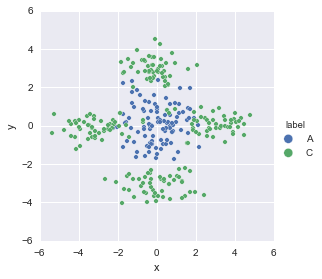

In [313]:
# plot the random data
g = sns.FacetGrid(data=df, hue='label', size=4)
g = g.map(plt.scatter, 'x', 'y', edgecolor='w')
g.add_legend(fontsize=10, markerscale=2)

In [354]:
# make a pipeline that adds polynomial features and does a logistic regression
p = make_pipeline(PolynomialFeatures(degree=1), LogisticRegression())

In [355]:
# fit the classifier
p.fit(df[['x','y']], df.label)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0))])

In [352]:
# make the decision boundary
xx, yy = np.meshgrid(np.arange(min(df.x), max(df.x), 0.2),
                     np.arange(min(df.y), max(df.y), 0.2))
Z = np.array(zip(*p.predict_proba(np.c_[xx.ravel(), yy.ravel()]))[0])

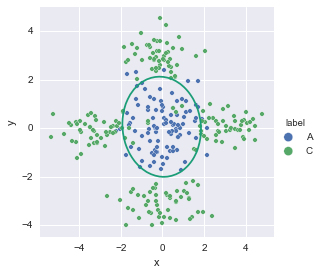

In [353]:
# plot the data and the decision boundary
g = sns.FacetGrid(data=df, hue='label', size=4)
g = g.map(plt.scatter, 'x', 'y', edgecolor='w')
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], cmap=plt.cm.Dark2)
g.add_legend(fontsize=10, markerscale=2)
g.savefig('decision_boundary', dpi=300)